# image segmentation 

In [13]:
# Import packages
from updated_mask_rcnn.samples.coco import coco
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from mrcnn.model import log
from mrcnn.visualize import display_instances
from mrcnn.model import MaskRCNN
from mrcnn.config import Config
from mrcnn import visualize
import mrcnn.model as modellib
from mrcnn import utils
import neptune.new as neptune

import os
import sys
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
# Root directory of the project
# PATH_TO_YOUR_WORK_DIRECTORY
ROOT_DIR = os.path.abspath('offline_frame_based_try')

# Import Mask RCNN from the Github installation
sys.path.append(ROOT_DIR)  # To find local version


# Import COCO config for the dataset
# To find local version of coco
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
# import coco

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to your trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")


In [14]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1


config = InferenceConfig()

# ### Sending log info to Neptune new version ###
# npt_exp['Model Config Pars'] = str(config.to_dict())


In [15]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on the COCO dataset
model.load_weights(
    '/mnt/e/DAIICT/Study Material/Semester 8/btp/code/offline_frame_based_try/mask_rcnn_coco.h5', by_name=True)

# Load the image for current task
image_path = '/mnt/e/DAIICT/Study Material/Semester 8/btp/code/offline_frame_based_try/frames/frame0.jpg'
img = load_img(image_path)
img = img_to_array(img)

# Make prediction
results = model.detect([img], verbose=1)


Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [16]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']


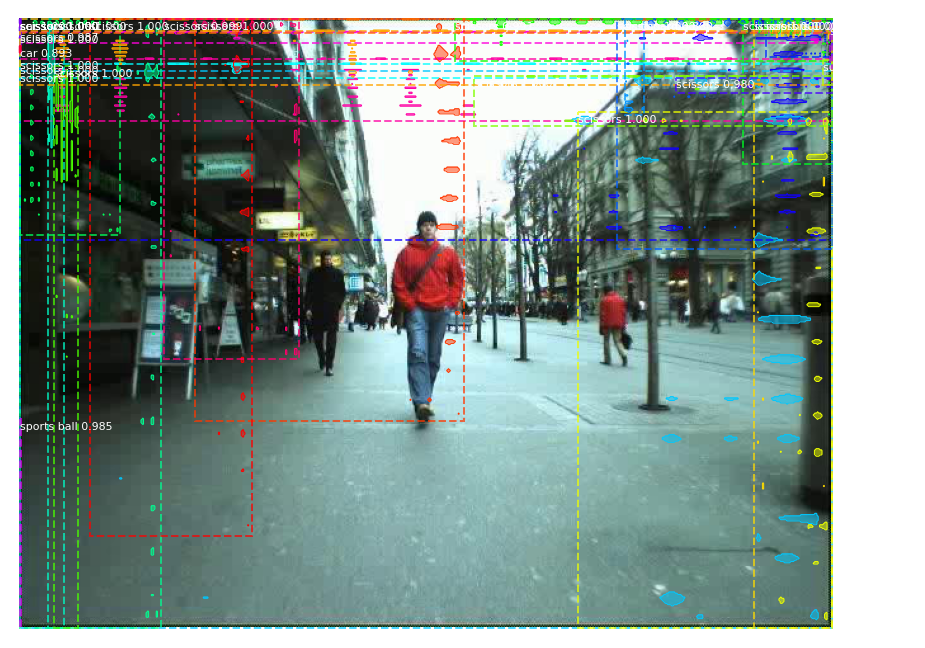

In [17]:
# get dictionary for first prediction
image_results = results[0]

box, mask, classID, score = image_results['rois'], image_results[
    'masks'], image_results['class_ids'], image_results['scores']

# show photo with bounding boxes, masks, class labels and scores
fig_images, cur_ax = plt.subplots(figsize=(15, 15))
display_instances(img, box, mask, classID, class_names, score, ax=cur_ax)

# # Log Predicted images to Neptune new version
# npt_exp['Predicted Image'].upload(neptune.types.File.as_image(fig_images))


# opencv

438 115 97 195 

385 119 72 144 

445 160 72 145 

174 171 67 133 



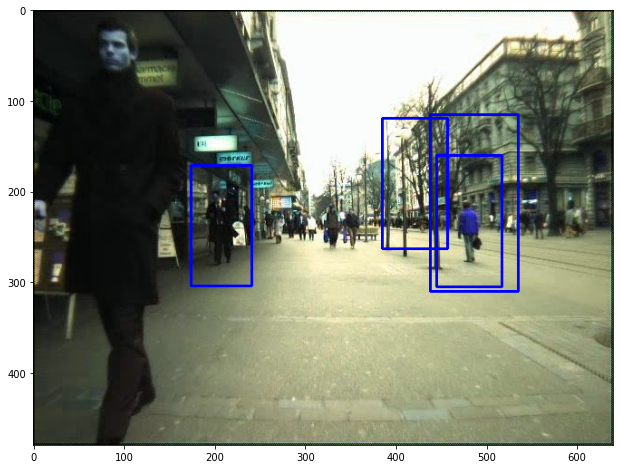

In [37]:
import cv2
import imutils
import matplotlib.pyplot as plt

# Initializing the HOG person
# detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Reading the Image
image = cv2.imread(
    '/mnt/e/DAIICT/Study Material/Semester 8/btp/code/offline_frame_based_try/frames/frame40.jpg')

# # Resizing the Image
# image = imutils.resize(image,
# 					width=min(400, image.shape[1]))

# Detecting all the regions in the
# Image that has a pedestrians inside it
(regions, _) = hog.detectMultiScale(image,
                                    winStride=(4, 4),
                                    padding=(4, 4),
                                    scale=1.05)

# Drawing the regions in the Image
for (x, y, w, h) in regions:
    print(x, y, w, h, '\n')
    cv2.rectangle(image, (x, y),
                  (x + w, y + h),
                  (0, 0, 255), 2)

# Showing the output Image
plt.figure(figsize=[12, 8])
plt.imshow(image)
plt.show()
# cv2.imshow("Image", image)
# cv2.waitKey(100)

# cv2.destroyAllWindows()


In [4]:
regions


array([[429, 140,  82, 164],
       [269, 134, 104, 207],
       [339, 133,  79, 158],
       [205, 164,  70, 140]], dtype=int32)

# YOLOV3

https://github.com/YunYang1994/TensorFlow2.0-Examples/tree/master/4-Object_Detection/YOLOV3

https://yunyang1994.gitee.io/2018/12/28/YOLOv3-%E7%AE%97%E6%B3%95%E7%9A%84%E4%B8%80%E7%82%B9%E7%90%86%E8%A7%A3/

In [2]:
#! /usr/bin/env python
# coding=utf-8
# ================================================================
#   Copyright (C) 2019 * Ltd. All rights reserved.
#
#   Editor      : VIM
#   File name   : image_demo.py
#   Author      : YunYang1994
#   Created date: 2019-07-12 13:07:27
#   Description :
#
# ================================================================

import cv2
import numpy as np
import YOLOV3.core.utils as utils
import tensorflow as tf
from YOLOV3.core.yolov3 import YOLOv3, decode
from PIL import Image

input_size = 416

input_layer = tf.keras.layers.Input([input_size, input_size, 3])
feature_maps = YOLOv3(input_layer)

bbox_tensors = []
for i, fm in enumerate(feature_maps):
    bbox_tensor = decode(fm, i)
    bbox_tensors.append(bbox_tensor)

model = tf.keras.Model(input_layer, bbox_tensors)
utils.load_weights(model, "./YOLOV3/yolov3.weights")
model.summary()


2022-03-06 11:31:58.410650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-06 11:31:58.706238: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shivani-nandani/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-03-06 11:31:58.731641: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-03-06 11:31:58.756106: I tensorflow/core/platform/

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 416, 416, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 416, 416, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [8]:
for i in np.arange(0,1000,1):

    image_path = "./frames/frame"+str(i)+".jpg"  # "./YOLOV3/docs/kite.jpg"

    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_image_size = original_image.shape[:2]

    image_data = utils.image_preporcess(
        np.copy(original_image), [input_size, input_size])
    image_data = image_data[np.newaxis, ...].astype(np.float32)

    pred_bbox = model.predict(image_data)
    pred_bbox = [tf.reshape(x, (-1, tf.shape(x)[-1])) for x in pred_bbox]
    pred_bbox = tf.concat(pred_bbox, axis=0)
    bboxes = utils.postprocess_boxes(
        pred_bbox, original_image_size, input_size, 0.3)
    bboxes = utils.nms(bboxes, 0.45, method='nms')

    image = utils.draw_bbox(original_image, bboxes)
    image = Image.fromarray(image)
    # image.show()
    image.save("./bboxs_frames/frame"+str(i)+".jpg")


In [6]:
image.save("./bboxs_frames/new.png")

In [3]:
bboxes


[array([224.55325317, 186.00500488, 258.23104858, 279.63870239,
          0.99556702,   0.        ]),
 array([294.32702637, 152.41972351, 351.06231689, 318.94363403,
          0.99445105,   0.        ]),
 array([455.987854  , 208.14102173, 483.30718994, 276.28695679,
          0.99323195,   0.        ]),
 array([552.3392334 , 207.71174622, 573.7008667 , 241.52142334,
          0.76081628,   0.        ]),
 array([208.3441925 , 188.45281982, 226.16096497, 256.56930542,
          0.68905842,   0.        ]),
 array([584.57879639, 214.03994751, 608.24890137, 246.62469482,
          0.63926119,   0.        ]),
 array([540.48919678, 216.40248108, 554.70288086, 248.01568604,
          0.62207705,   0.        ]),
 array([167.3401947 , 204.09460449, 189.24890137, 264.10586548,
          0.57283783,   0.        ]),
 array([264.84570312, 213.54273987, 286.39126587, 247.28359985,
          0.46162215,   0.        ]),
 array([5.18627869e+02, 2.17450058e+02, 5.29257446e+02, 2.43342957e+02,
        4.

# YOLOV5

https://pytorch.org/hub/ultralytics_yolov5/

https://stackoverflow.com/questions/48152674/how-to-check-if-pytorch-is-using-the-gpu

https://blog.roboflow.com/yolov4-versus-yolov5/

https://towardsdatascience.com/yolo-v4-or-yolo-v5-or-pp-yolo-dad8e40f7109

In [1]:
import torch
import numpy as np
import pandas as pd

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)

Using cache found in /home/shivani-nandani/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-3-7 torch 1.10.2 CPU

Fusing layers... 
Model Summary: 444 layers, 86705005 parameters, 0 gradients, 205.7 GFLOPs
Adding AutoShape... 


In [13]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cpu



In [6]:
detection_results = pd.DataFrame(columns=['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name', 'frame'])
detection_results

,xmin,ymin,xmax,ymax,confidence,class,name,frame


In [ ]:
detection_results = pd.DataFrame(columns=['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name', 'frame'])

for i in np.arange(0,330,1):

    image_path = "./street_frames/frame"+str(i)+".jpg" 

    # Inference
    results = model(image_path)

    # Results
    results.print()
    # results.show()  
    results.save('./street_yolov5x_frames/')

    # results.xyxy[0]  # img1 predictions (tensor)
    # print(results.pandas().xyxy[0]) # img1 predictions (pandas)

    frame_obj_i_start = len(detection_results)
    detection_results = pd.concat([detection_results, results.pandas().xyxy[0]], ignore_index=True)
    frame_obj_i_end = frame_obj_i_start + len(results.pandas().xyxy[0])
    detection_results['frame'][frame_obj_i_start:frame_obj_i_end] = i
    
    
detection_results

In [8]:
detection_results.to_csv('./street_detection_results.csv')

In [12]:
from PIL import Image 

for i in range(len(detection_results)):

    if detection_results.name[i] == 'person' and detection_results.confidence[i]>=0.5:
        
        img = Image.open('./street_frames/frame'+str(detection_results.frame[i])+'.jpg') 

        left = detection_results.xmin[i]
        top = detection_results.ymin[i]
        right = detection_results.xmax[i]
        bottom = detection_results.ymax[i]

        img_res = img.crop((left, top, right, bottom))

        img_res.save('./street_persons_frames/frame'+str(detection_results.frame[i])+'_'+str(i)+'.jpg') 